In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing data
data = pd.read_csv('churn_prediction.csv')

In [3]:
#first 5 instances using "head()" function
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,1,2101,66,Male,0.0,self_employed,187.0,2,755,1458.71,...,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21
1,2,2348,35,Male,0.0,self_employed,NaN,2,3214,5390.37,...,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,2019-11-01
2,4,2194,31,Male,0.0,salaried,146.0,2,41,3913.16,...,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT
3,5,2329,90,NaN,NaN,self_employed,1020.0,2,582,2291.91,...,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,2019-08-06
4,6,1579,42,Male,2.0,self_employed,1494.0,3,388,927.72,...,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2019-11-03


In [4]:
#last 5 instances using "tail()" function
data.tail()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
28377,30297,2325,10,Female,0.0,student,1020.0,2,1207,1076.43,...,2282.19,2787.70,0.30,0.30,0.30,0.30,1076.43,1076.43,0,2019-10-22
28378,30298,1537,34,Female,0.0,self_employed,1046.0,2,223,3844.10,...,3668.83,3865.55,1.71,2.29,901.00,1014.07,3738.54,3690.32,0,2019-12-17
28379,30299,2376,47,Male,0.0,salaried,1096.0,2,588,65511.97,...,53444.81,21925.81,4666.84,3883.06,168.23,71.80,61078.50,57564.24,1,2019-12-31
28380,30300,1745,50,Male,3.0,self_employed,1219.0,3,274,1625.55,...,1683.20,1857.42,0.20,0.20,0.20,0.20,1625.55,1625.55,0,NaT
28381,30301,1175,18,Male,0.0,student,1232.0,2,474,2107.05,...,3213.44,4447.45,0.11,7.44,714.40,1094.09,2402.62,3260.58,1,2019-11-02


In [5]:
#Printing all the columns present in data
data.columns

Index(['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation',
       'city', 'customer_nw_category', 'branch_code', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn',
       'last_transaction'],
      dtype='object')

In [6]:
# A closer look at the data types present in the data
data.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
last_transaction                   object
dtype: object

In [7]:
# converting churn to category
data['churn'] = data['churn'].astype('category')
data['branch_code'] = data['branch_code'].astype('category')
data['customer_nw_category'] = data['customer_nw_category'].astype('category')

In [8]:
# converting "dependents" and "city" to their respective types
data['dependents'] = data['dependents'].astype('Int64')
data['city'] = data['city'].astype('category')

# checking
data[['dependents','city']].dtypes

dependents       Int64
city          category
dtype: object

In [9]:
# typecasting "gender" and "occupation" to category type
data['gender'] = data['gender'].astype('category')
data['occupation'] = data['occupation'].astype('category')

# checking
data[['gender','occupation']].dtypes

gender        category
occupation    category
dtype: object

In [10]:
# creating an instance(date) of DatetimeIndex class using "last_transaction"
date = pd.DatetimeIndex(data['last_transaction'])

In [11]:
# extracting new columns from "last_transaction"

# last day of year when transaction was done
data['doy_ls_tran'] = date.dayofyear

# week of year when last transaction was done
data['woy_ls_tran'] = date.weekofyear

# month of year when last transaction was done
data['moy_ls_tran'] = date.month

# day of week when last transaction was done
data['dow_ls_tran'] = date.dayofweek

C:\Users\DELL\AppData\Local\Temp\ipykernel_16748\2564682631.py:7: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  data['woy_ls_tran'] = date.weekofyear


In [12]:
# checking new extracted columns using datetime
data[['last_transaction','doy_ls_tran','woy_ls_tran','moy_ls_tran','dow_ls_tran']].head()

,last_transaction,doy_ls_tran,woy_ls_tran,moy_ls_tran,dow_ls_tran
0,2019-05-21,141.0,21.0,5.0,1.0
1,2019-11-01,305.0,44.0,11.0,4.0
2,NaT,NaN,NaN,NaN,NaN
3,2019-08-06,218.0,32.0,8.0,1.0
4,2019-11-03,307.0,44.0,11.0,6.0


In [13]:
data = data.drop(columns = ['last_transaction'])
data.dtypes

customer_id                          int64
vintage                              int64
age                                  int64
gender                            category
dependents                           Int64
occupation                        category
city                              category
customer_nw_category              category
branch_code                       category
current_balance                    float64
previous_month_end_balance         float64
average_monthly_balance_prevQ      float64
average_monthly_balance_prevQ2     float64
current_month_credit               float64
previous_month_credit              float64
current_month_debit                float64
previous_month_debit               float64
current_month_balance              float64
previous_month_balance             float64
churn                             category
doy_ls_tran                        float64
woy_ls_tran                        float64
moy_ls_tran                        float64
dow_ls_tran

In [14]:
# seggregating variables into groups
customer_details = ['customer_id','age','vintage']
current_month = ['current_balance','current_month_credit','current_month_debit','current_month_balance']
previous_month = ['previous_month_end_balance','previous_month_credit','previous_month_debit','previous_month_balance']
previous_quarters = ['average_monthly_balance_prevQ','average_monthly_balance_prevQ2']
transaction_date = ['doy_ls_tran','woy_ls_tran','moy_ls_tran','dow_ls_tran']

In [15]:
# standard deviation factor
factor = 3
# copying current_month
cm_data = data[current_month]

# filtering using standard deviation (not considering obseravtions > 3* standard deviation)
cm_data = cm_data[cm_data['current_balance'] < factor*cm_data['current_balance'].std()]
cm_data = cm_data[cm_data['current_month_credit'] < factor*cm_data['current_month_credit'].std()]
cm_data = cm_data[cm_data['current_month_debit'] < factor*cm_data['current_month_debit'].std()]
cm_data = cm_data[cm_data['current_month_balance'] < factor*cm_data['current_month_balance'].std()]

# checking how many points removed
len(data), len(cm_data)

(28382, 27113)

In [16]:
# finding number of missing values in every variable
data.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
doy_ls_tran                       3223
woy_ls_tran                       3223
moy_ls_tran                       3223
dow_ls_tran                       3223
dtype: int64

In [17]:
# custom function for easy outlier analysis

def UVA_outlier(data, var_group):
  size = len(var_group)
  plt.figure(figsize = (7*size,4), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    quant25 = data[i].quantile(0.25)
    quant75 = data[i].quantile(0.75)
    IQR = quant75 - quant25
    med = data[i].median()
    whis_low = quant25-(1.5*IQR)
    whis_high = quant75+(1.5*IQR)

    # Calculating Number of Outliers
    outlier_high = len(data[i][data[i]>whis_high])
    outlier_low = len(data[i][data[i]<whis_low])

    
    #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.boxplot(data[i], orient="v")
    plt.ylabel('{}'.format(i))
    plt.title('IQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))
      

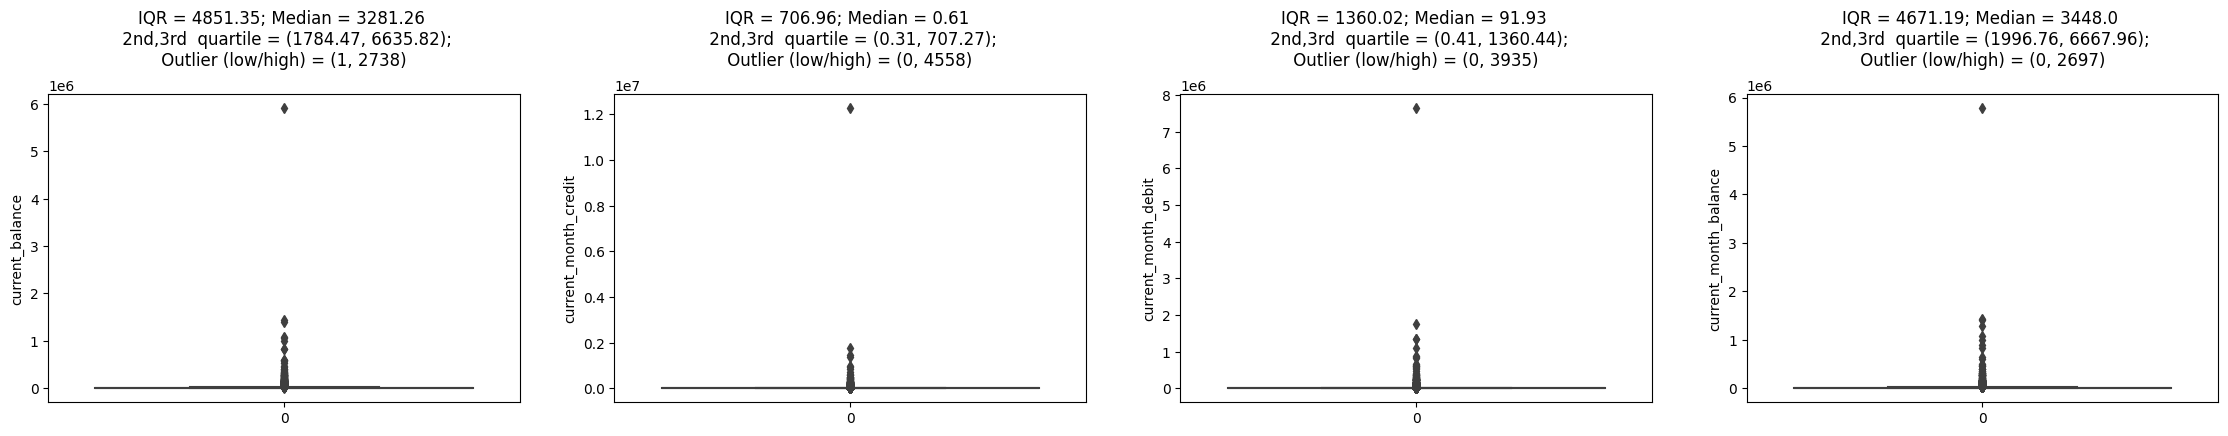

In [18]:
UVA_outlier(data, current_month)

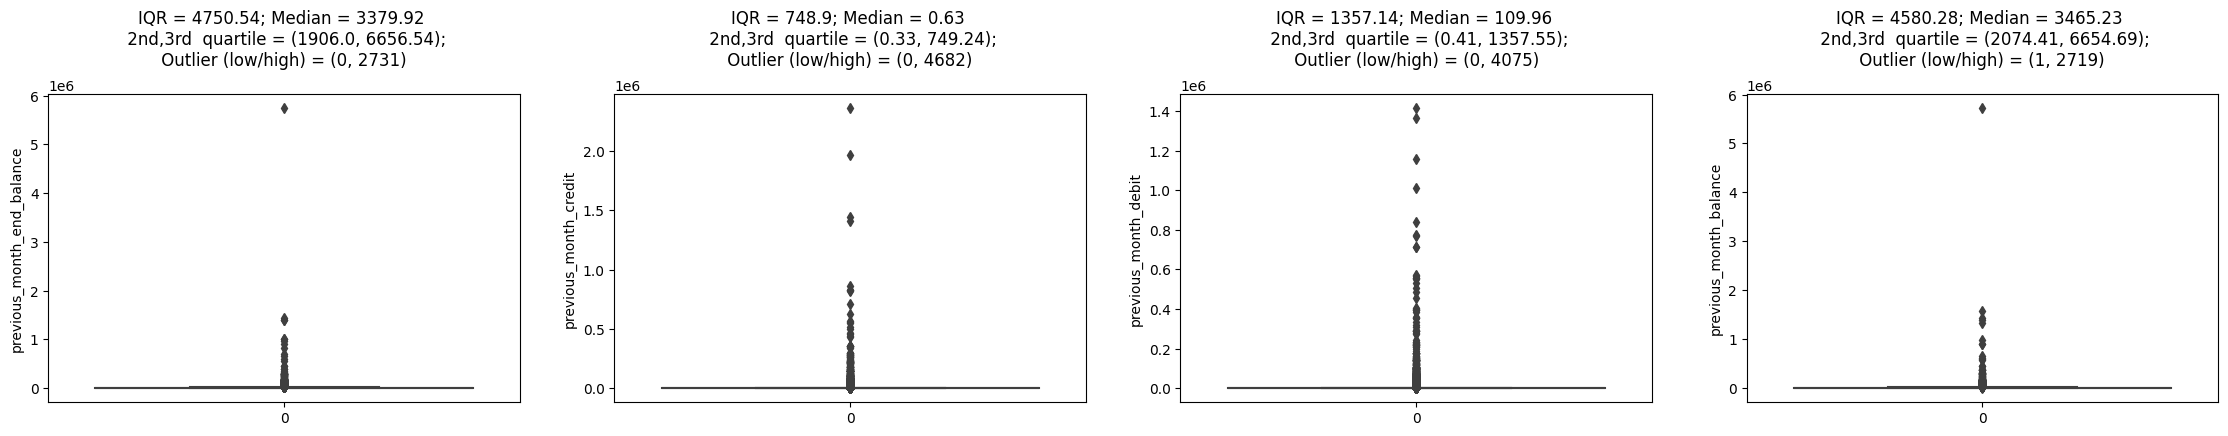

In [19]:
UVA_outlier(data, previous_month)

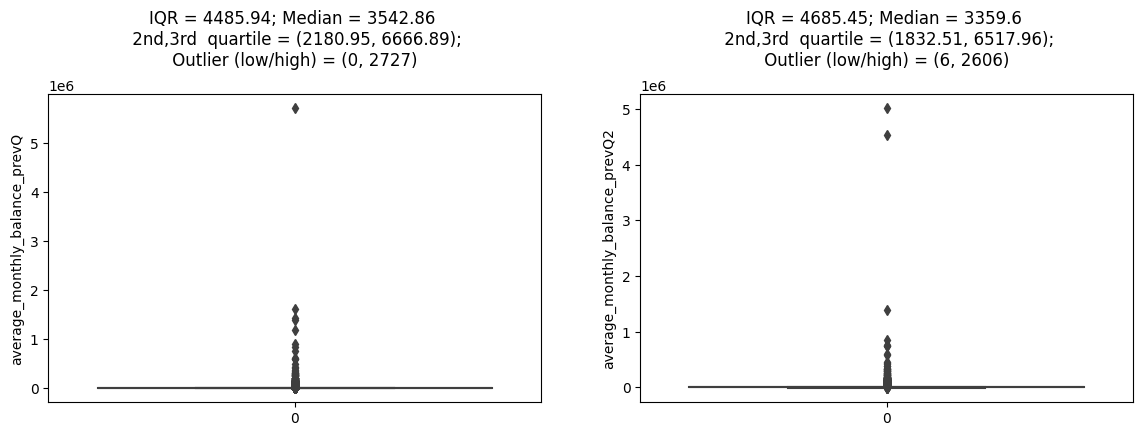

In [20]:
UVA_outlier(data,previous_quarters)

In [21]:
# isolating numerical datatypes
numerical = data.select_dtypes(include=['int64','float64','Int64'])[:]
numerical.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
dependents                          Int64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
doy_ls_tran                       float64
woy_ls_tran                       float64
moy_ls_tran                       float64
dow_ls_tran                       float64
dtype: object

In [22]:
# calculating correlation
correlation = numerical.dropna().corr()
correlation

,customer_id,vintage,age,dependents,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,doy_ls_tran,woy_ls_tran,moy_ls_tran,dow_ls_tran
customer_id,1.000000,-0.011288,0.001397,-0.009737,0.014989,0.012414,0.011372,0.008060,0.004223,-0.004819,0.004870,-0.005906,0.012085,0.011025,-0.006114,0.011344,-0.005374,0.009665
vintage,-0.011288,1.000000,0.003170,0.005109,-0.007223,-0.008001,-0.010858,-0.003824,-0.004821,-0.000410,-0.004899,-0.007777,-0.008703,-0.010439,-0.000680,-0.010040,-0.001359,-0.009683
age,0.001397,0.003170,1.000000,-0.003809,0.058925,0.062775,0.070903,0.081361,0.023921,0.027678,0.025366,0.027717,0.063120,0.067712,0.010754,0.000501,0.011970,-0.020895
dependents,-0.009737,0.005109,-0.003809,1.000000,-0.004554,-0.000826,0.000121,0.002584,0.002188,0.022772,0.006784,0.029073,-0.001859,0.000241,0.079740,0.034460,0.077978,-0.001702
current_balance,0.014989,-0.007223,0.058925,-0.004554,1.000000,0.809257,0.857204,0.584156,0.053329,0.101495,0.075149,0.151771,0.940234,0.812295,0.035242,-0.008980,0.033127,-0.000315
previous_month_end_balance,0.012414,-0.008001,0.062775,-0.000826,0.809257,1.000000,0.908053,0.661439,0.051080,0.195149,0.100379,0.192376,0.910206,0.912269,0.024130,0.000946,0.023485,0.002033
average_monthly_balance_prevQ,0.011372,-0.010858,0.070903,0.000121,0.857204,0.908053,1.000000,0.731953,0.051294,0.138967,0.091491,0.187226,0.920943,0.983797,0.021103,-0.000577,0.020949,0.000647
average_monthly_balance_prevQ2,0.008060,-0.003824,0.081361,0.002584,0.584156,0.661439,0.731953,1.000000,0.085542,0.127557,0.098455,0.162203,0.642531,0.701780,0.010306,-0.012720,0.009123,-0.002463
current_month_credit,0.004223,-0.004821,0.023921,0.002188,0.053329,0.051080,0.051294,0.085542,1.000000,0.165102,0.941455,0.116125,0.055339,0.055020,0.031828,0.008664,0.030267,0.000752
previous_month_credit,-0.004819,-0.000410,0.027678,0.022772,0.101495,0.195149,0.138967,0.127557,0.165102,1.000000,0.160198,0.749628,0.141613,0.178147,0.070141,0.016762,0.066691,-0.006657


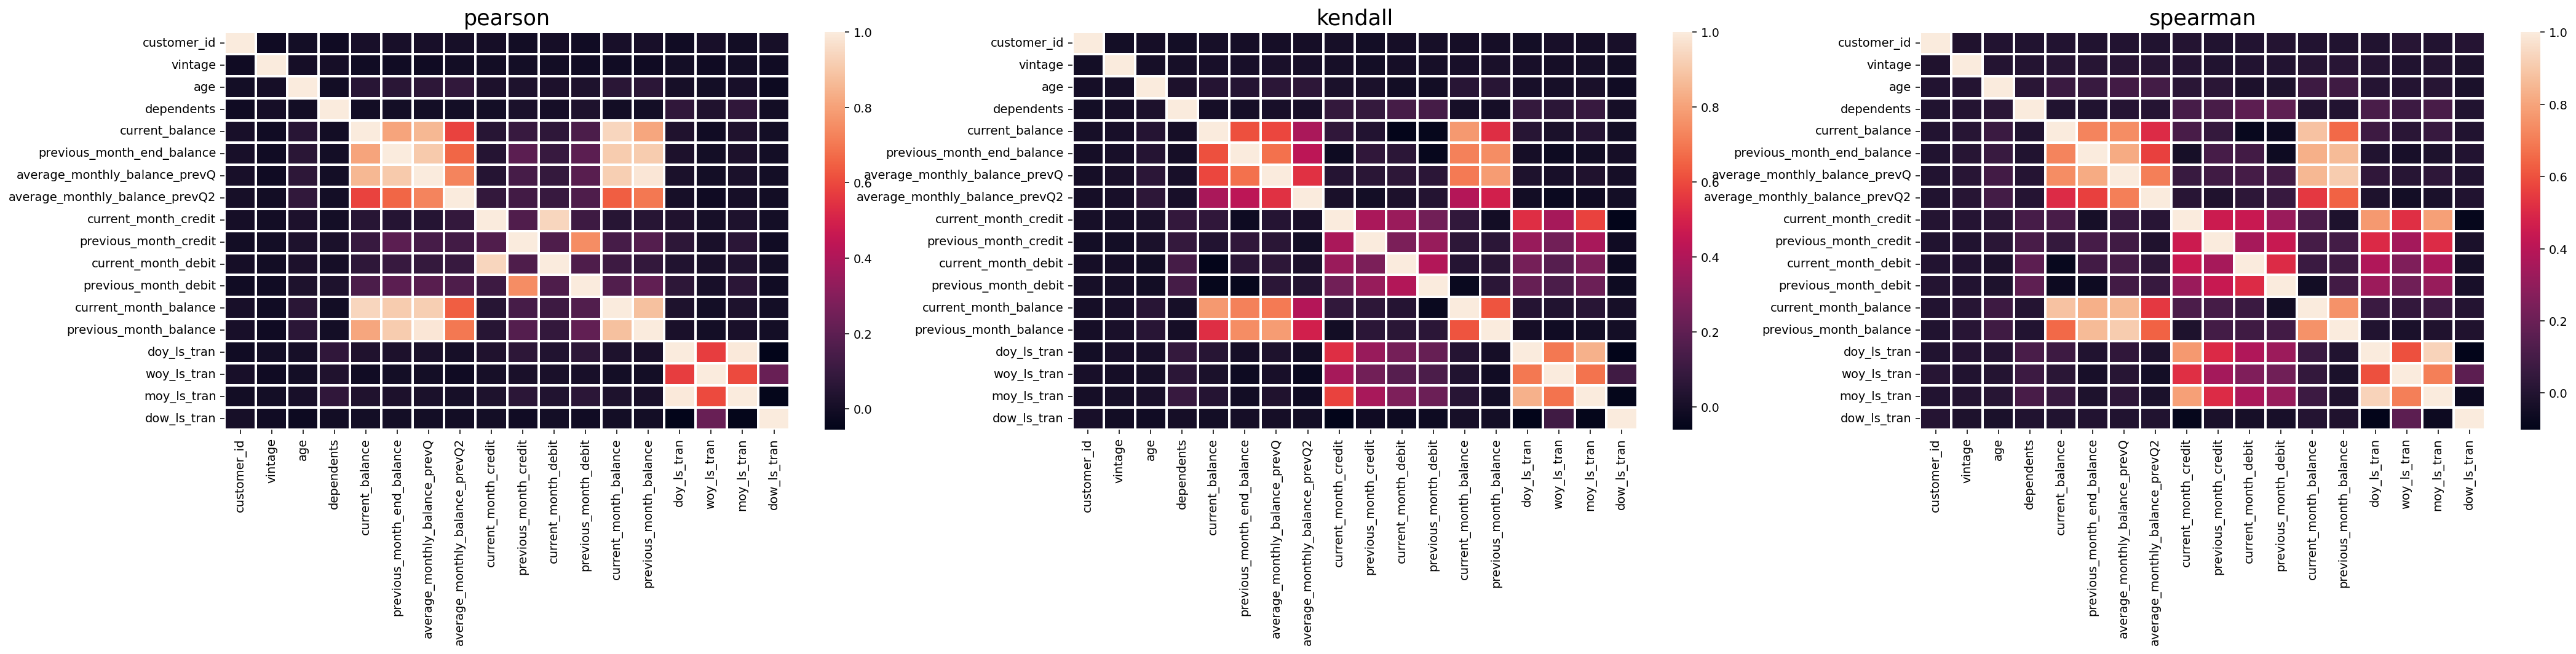

In [23]:
# plotting heatmap usill all methods for all numerical variables
plt.figure(figsize=(36,6), dpi=140)
for j,i in enumerate(['pearson','kendall','spearman']):
  plt.subplot(1,3,j+1)
  correlation = numerical.dropna().corr(method=i)
  sns.heatmap(correlation, linewidth = 2)
  plt.title(i, fontsize=18)


In [25]:
#Suitable datatype for Creating Pivot table in Pandas version (categorical datatype is not supported)
data['gender'] = data['gender'].astype('object')
data['occupation'] = data['occupation'].astype('object')
data['customer_nw_category'] = data['customer_nw_category'].astype('object')
data['churn'] = data['churn'].astype('int')
data['city'] = data['city'].astype('float')
data['branch_code'] = data['branch_code'].astype('float')

In [26]:
# Gender, Occupation, Customer Net worth category with Churn
data.pivot_table('churn', ['gender', 'occupation'], 'customer_nw_category', aggfunc='mean')*100

customer_nw_category           1          2          3
gender occupation                                     
Female company        100.000000   0.000000  66.666667
       retired         20.689655  11.219512  13.492063
       salaried        18.545455  14.849188  17.689016
       self_employed   18.111588  18.197035  18.920916
       student         10.404624  14.442413  15.034965
Male   company          0.000000   0.000000   0.000000
       retired         18.497110  14.251781  16.316640
       salaried        17.557252  16.410469  18.468702
       self_employed   22.832370  20.424978  21.465808
       student         16.969697  17.210145  18.208955

In [27]:
# Gender, Age, Occupation with Churning Status
age = pd.cut(data['age'], [0, 25, 50, 100])
data.pivot_table('churn', ['gender', age], 'occupation', aggfunc='sum')

occupation        company  retired  salaried  self_employed  student
gender age                                                          
Female (0, 25]          0        0         7             27      102
       (25, 50]         2        0       226            852       38
       (50, 100]        1       52        70            605        0
Male   (0, 25]          0        0        17             74      137
       (25, 50]         0        2       563           1107       47
       (50, 100]        0      251       264            698        0

In [28]:
age = pd.cut(data['age'], [0, 25, 50, 100])
data.pivot_table('churn', ['gender', age], 'occupation', aggfunc='mean')*100

occupation        company    retired   salaried  self_employed    student
gender age                                                               
Female (0, 25]        NaN        NaN  15.909091      21.774194  13.421053
       (25, 50]      50.0   0.000000  16.096866      19.163293  15.510204
       (50, 100]     50.0  13.541667  17.948718      17.370083   0.000000
Male   (0, 25]        0.0        NaN  20.987654      30.327869  16.545894
       (25, 50]       0.0  14.285714  17.349769      21.886121  21.076233
       (50, 100]      0.0  15.493827  17.165150      19.340538   0.000000

In [29]:
# Gender,Age,Occupation and Current Balance with Churning Status
balance = pd.qcut(data['current_balance'], 3)
data.pivot_table('churn', ['gender', age], [balance, 'occupation'], aggfunc='sum')

current_balance  (-5503.961, 2202.177]                                         \
occupation                     company retired salaried self_employed student   
gender age                                                                      
Female (0, 25]                       0       0        5            22      64   
       (25, 50]                      1       0      146           522      20   
       (50, 100]                     1      34       45           353       0   
Male   (0, 25]                       0       0       12            52      95   
       (25, 50]                      0       0      328           694      30   
       (50, 100]                     0     156      150           364       0   

current_balance  (2202.177, 5114.317]                                         \
occupation                    company retired salaried self_employed student   
gender age                                                                     
Female (0, 25]                      0       0        1             4      21   
       (25, 50]                     1       0       51           171       7   
       (50, 100]                    0       8       14           125       0   
Male   (0, 25]                      0       0        4            12      20   
       (25, 50]                     0       1      129           208      10   
       (50, 100]                    0      39       52           143       0   

current_balance  (5114.317, 5905904.03]                                         
occupation                      company retired salaried self_employed student  
gender age                                                                      
Female (0, 25]                        0       0        1             1      17  
       (25, 50]                       0       0       29           159      11  
       (50, 100]                      0      10       11           127       0  
Male   (0, 25]                        0       0        1            10      22  
       (25, 50]                       0       1      106           205       7  
       (50, 100]                      0      56       62           191       0

In [30]:
balance = pd.qcut(data['current_balance'], 3)
data.pivot_table('churn', ['gender', age], [balance, 'occupation'], aggfunc='mean')*100

current_balance  (-5503.961, 2202.177]                                      \
occupation                     company    retired   salaried self_employed   
gender age                                                                   
Female (0, 25]                     NaN        NaN  26.315789     38.596491   
       (25, 50]                   50.0   0.000000  32.300885     33.677419   
       (50, 100]                 100.0  28.333333  35.156250     30.642361   
Male   (0, 25]                     0.0        NaN  35.294118     52.000000   
       (25, 50]                    0.0   0.000000  33.367243     38.901345   
       (50, 100]                   0.0  29.489603  32.119914     33.060854   

current_balance             (2202.177, 5114.317]                        \
occupation          student              company    retired   salaried   
gender age                                                               
Female (0, 25]    21.262458                  NaN        NaN   5.882353   
       (25, 50]   25.974026                100.0   0.000000   9.826590   
       (50, 100]   0.000000                  NaN   5.633803  11.200000   
Male   (0, 25]    28.189911                  NaN        NaN  14.285714   
       (25, 50]   44.117647                  0.0  16.666667  11.889401   
       (50, 100]        NaN                  0.0   6.927176  10.766046   

current_balance                           (5114.317, 5905904.03]             \
occupation       self_employed    student                company    retired   
gender age                                                                    
Female (0, 25]       10.810811   7.167235                    NaN        NaN   
       (25, 50]      10.891720   6.862745                    0.0        NaN   
       (50, 100]     11.052166        NaN                    0.0   8.196721   
Male   (0, 25]       14.117647   6.493506                    NaN        NaN   
       (25, 50]      13.214740  12.345679                    0.0  20.000000   
       (50, 100]     12.565905        NaN                    0.0  10.606061   

current_balance                                       
occupation         salaried self_employed    student  
gender age                                            
Female (0, 25]    12.500000      3.333333  10.240964  
       (25, 50]    6.697460     11.990950  16.666667  
       (50, 100]   8.029197     10.583333        NaN  
Male   (0, 25]     5.263158     16.949153  12.021858  
       (25, 50]    9.005947     12.058824   9.459459  
       (50, 100]  10.544218     13.941606   0.000000

In [31]:
data_encoded = pd.get_dummies(data, drop_first=True)
data_encoded.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_16748\2609465671.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  data_encoded = pd.get_dummies(data, drop_first=True)


,customer_id,vintage,age,dependents,city,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,...,woy_ls_tran,moy_ls_tran,dow_ls_tran,gender_Male,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student,customer_nw_category_2,customer_nw_category_3
0,1,2101,66,0,187.0,755.0,1458.71,1458.71,1458.71,1449.07,...,21.0,5.0,1.0,1,0,0,1,0,1,0
1,2,2348,35,0,NaN,3214.0,5390.37,8704.66,7799.26,12419.41,...,44.0,11.0,4.0,1,0,0,1,0,1,0
2,4,2194,31,0,146.0,41.0,3913.16,5815.29,4910.17,2815.94,...,NaN,NaN,NaN,1,0,1,0,0,1,0
3,5,2329,90,<NA>,1020.0,582.0,2291.91,2291.91,2084.54,1006.54,...,32.0,8.0,1.0,0,0,0,1,0,1,0
4,6,1579,42,2,1494.0,388.0,927.72,1401.72,1643.31,1871.12,...,44.0,11.0,6.0,1,0,0,1,0,0,1


In [32]:
# Missing Values with Mode
def fill_mode(df):
    for column in df.columns:
        df[column].fillna(df[column].mode()[0], inplace=True)

In [33]:
fill_mode(data_encoded)

#  Segregating variables: Independent and Dependent Variables

In [34]:
data_encoded = data_encoded.drop('customer_id', axis=1)

In [35]:
#seperating independent and dependent variables
x = data_encoded.drop(['churn'], axis=1)
y = data_encoded['churn']
x.shape, y.shape

((28382, 26), (28382,))

In [36]:
data_encoded.columns

Index(['vintage', 'age', 'dependents', 'city', 'branch_code',
       'current_balance', 'previous_month_end_balance',
       'average_monthly_balance_prevQ', 'average_monthly_balance_prevQ2',
       'current_month_credit', 'previous_month_credit', 'current_month_debit',
       'previous_month_debit', 'current_month_balance',
       'previous_month_balance', 'churn', 'doy_ls_tran', 'woy_ls_tran',
       'moy_ls_tran', 'dow_ls_tran', 'gender_Male', 'occupation_retired',
       'occupation_salaried', 'occupation_self_employed', 'occupation_student',
       'customer_nw_category_2', 'customer_nw_category_3'],
      dtype='object')

# Splitting the data into train set and the test set

In [37]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 56)

# Normalising using *min_max_scaler*

In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [39]:
cols = train_x.columns
cols

Index(['vintage', 'age', 'dependents', 'city', 'branch_code',
       'current_balance', 'previous_month_end_balance',
       'average_monthly_balance_prevQ', 'average_monthly_balance_prevQ2',
       'current_month_credit', 'previous_month_credit', 'current_month_debit',
       'previous_month_debit', 'current_month_balance',
       'previous_month_balance', 'doy_ls_tran', 'woy_ls_tran', 'moy_ls_tran',
       'dow_ls_tran', 'gender_Male', 'occupation_retired',
       'occupation_salaried', 'occupation_self_employed', 'occupation_student',
       'customer_nw_category_2', 'customer_nw_category_3'],
      dtype='object')

In [40]:
train_x_scaled = scaler.fit_transform(train_x)
train_x_scaled = pd.DataFrame(train_x_scaled, columns=cols)
train_x_scaled.head()

,vintage,age,dependents,city,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,...,woy_ls_tran,moy_ls_tran,dow_ls_tran,gender_Male,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student,customer_nw_category_2,customer_nw_category_3
0,0.928007,0.348315,0.000000,0.378034,0.499686,0.002316,0.001973,0.000966,0.003331,3.390372e-04,...,0.980392,1.000000,1.000000,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.929255,0.516854,0.000000,0.009102,0.199749,0.000937,0.000563,0.000011,0.003458,4.527154e-04,...,0.941176,1.000000,0.333333,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.956305,0.808989,0.000000,0.618932,0.232796,0.001390,0.000922,0.000114,0.003467,4.197765e-07,...,1.000000,1.000000,0.166667,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.642530,0.258427,0.000000,0.906553,0.210625,0.001194,0.000870,0.000132,0.003326,1.354118e-08,...,0.784314,0.818182,0.833333,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.897628,0.494382,0.019231,0.665049,0.019034,0.010039,0.011464,0.011463,0.013612,3.685034e-02,...,0.980392,1.000000,0.666667,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [41]:
test_x_scaled = scaler.transform(test_x)
test_x_scaled = pd.DataFrame(test_x_scaled, columns=cols)
test_x_scaled.head()

,vintage,age,dependents,city,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,...,woy_ls_tran,moy_ls_tran,dow_ls_tran,gender_Male,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student,customer_nw_category_2,customer_nw_category_3
0,0.933000,0.516854,0.019231,0.747573,0.021334,0.001343,0.000952,0.000220,0.004242,5.128721e-05,...,1.000000,1.000000,0.333333,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.841448,0.337079,0.000000,0.665049,0.018406,0.001781,0.001474,0.000652,0.004185,1.083294e-07,...,0.843137,0.818182,0.333333,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.917603,0.629213,0.000000,0.374393,0.047689,0.001189,0.000873,0.000020,0.003524,3.723824e-07,...,0.666667,0.636364,0.500000,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.712859,0.269663,0.000000,0.618932,0.230914,0.000911,0.000578,0.000902,0.007583,3.249883e-07,...,0.803922,0.818182,0.333333,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.927591,0.853933,0.000000,0.248180,0.068605,0.000986,0.000654,0.000241,0.003854,1.489530e-07,...,0.058824,0.000000,0.666667,1.0,1.0,0.0,0.0,0.0,0.0,1.0


# Model Building

In [42]:
#importing Logistic Regression and metric accuracy score
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.metrics import accuracy_score
# Creating instance of Logistic Regresssion
logreg = LogReg()

# Fitting the model
logreg.fit(train_x, train_y)

# Predicting over the Train
train_predict = logreg.predict(train_x)
train_predict

# Calculating accuracy-score
k = accuracy_score(train_predict, train_y)
print('Training accuracy_score', k )

# Predicting over the Test Set and accuracy-score
test_predict = logreg.predict(test_x)
k = accuracy_score(test_predict, test_y)
print('Test accuracy_score    ', k )


Training accuracy_score 0.8238748473174857
Test accuracy_score     0.8279312288613303


C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [47]:
from sklearn.metrics import classification_report
k = classification_report(test_y, test_predict)
print(k)

              precision    recall  f1-score   support

           0       0.83      0.99      0.90      5800
           1       0.78      0.08      0.15      1296

    accuracy                           0.83      7096
   macro avg       0.81      0.54      0.52      7096
weighted avg       0.82      0.83      0.77      7096



# Precision-Recall Curve

In [49]:
predicted_probabilities = logreg.predict_proba(test_x)

In [50]:
# gathering Precision/recall scores for different thresholds
from sklearn.metrics import precision_recall_curve
precision_points, recall_points, threshold_points = precision_recall_curve(test_y, predicted_probabilities[:,1])
precision_points.shape, recall_points.shape, threshold_points.shape

((7096,), (7096,), (7095,))

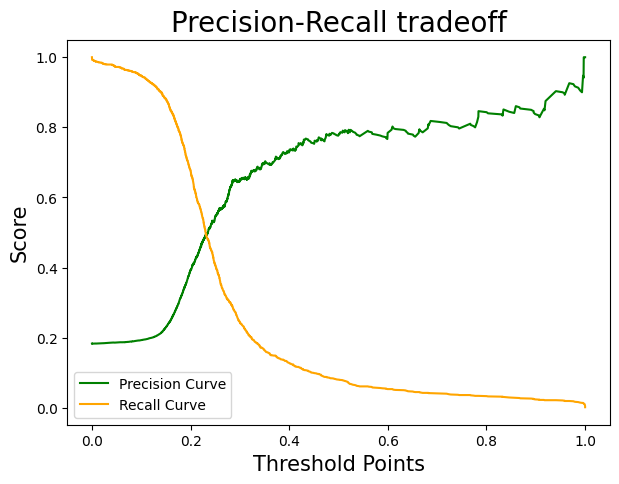

In [51]:
plt.figure(figsize = (7,5), dpi = 100)
plt.plot( threshold_points, precision_points[:-1], color = 'green', label = 'Precision Curve')
plt.plot( threshold_points, recall_points[:-1], color = 'orange', label = 'Recall Curve')
plt.xlabel('Threshold Points', fontsize = 15)
plt.ylabel('Score', fontsize = 15)
plt.title('Precision-Recall tradeoff', fontsize = 20)
plt.legend()

# AUC-ROC Curve

In [52]:
from sklearn.metrics import roc_curve , roc_auc_score
fpr, tpr, threshold = roc_curve(test_y, predicted_probabilities[:,1])

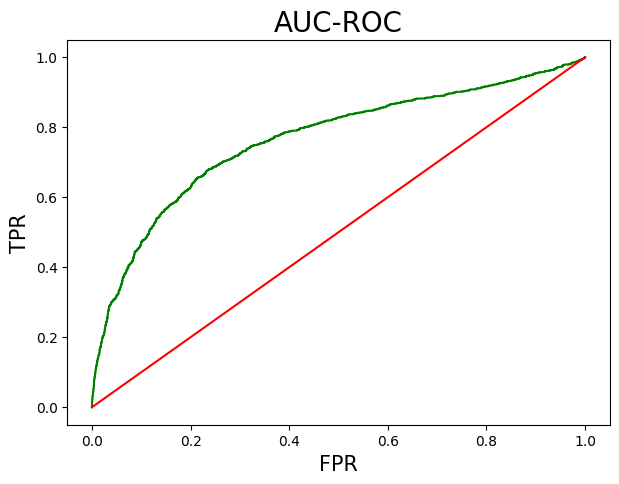

0.7641733184333758

In [54]:
plt.figure(figsize = (7,5), dpi = 100)
plt.plot( fpr, tpr, color = 'green')
plt.plot( [0,1], [0,1], label = 'baseline', color = 'red')
plt.xlabel('FPR', fontsize = 15)
plt.ylabel('TPR', fontsize = 15)
plt.title('AUC-ROC', fontsize = 20)
plt.show()
roc_auc_score(test_y, predicted_probabilities[:,1])

#  Coefficient Plot

In [56]:
# arranging the data
c = logreg.coef_.reshape(-1)
x = x.columns

coeff_plot = pd.DataFrame( {
                            'coefficients': c,
                            'variable' : x
                            })

# sorting the values
coeff_plot = coeff_plot.sort_values(by = 'coefficients')
coeff_plot.head()

,coefficients,variable
0,-0.000660,vintage
5,-0.000175,current_balance
3,-0.000110,city
15,-0.000095,doy_ls_tran
1,-0.000032,age


Text(0.5, 1.0, 'Coefficient plot')

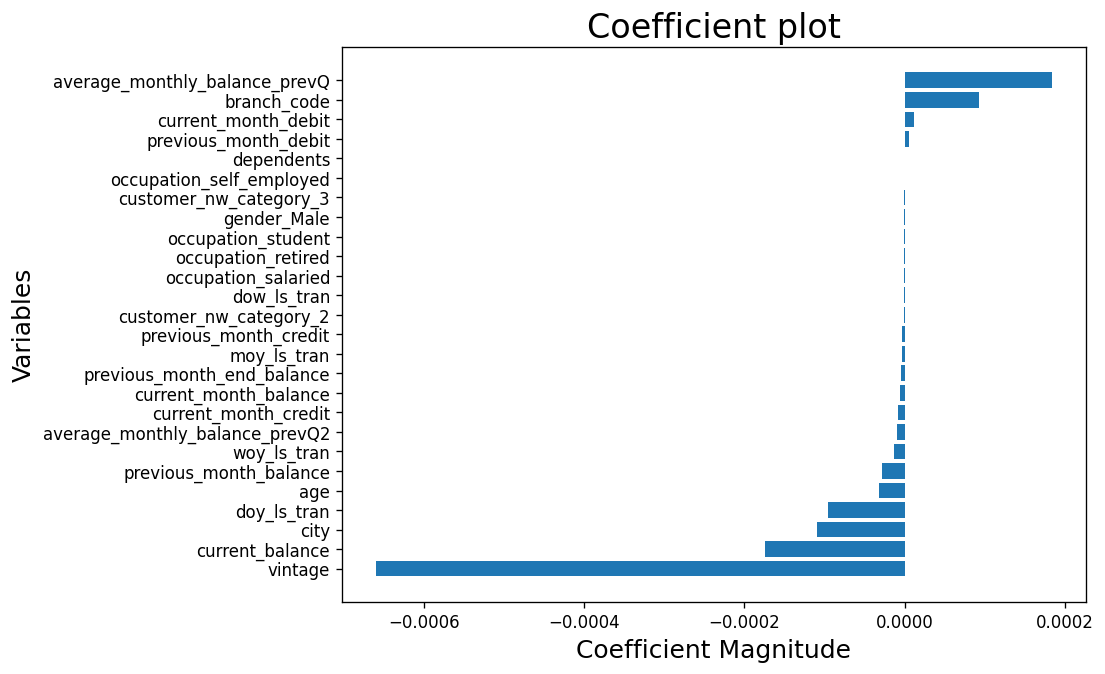

In [57]:
plt.figure(figsize=(8, 6), dpi=120)
plt.barh( coeff_plot['variable'] , coeff_plot['coefficients'] )
plt.xlabel( "Coefficient Magnitude", fontsize = 15)
plt.ylabel('Variables', fontsize = 15)
plt.title('Coefficient plot', fontsize = 20)